In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns 

In [327]:
df = pd.read_csv('ExpVinho.csv', sep=";")

In [328]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [329]:
nomes_colunas_invertidos = df.columns[::-1]
nomes_colunas_invertidos

Index(['2023.1', '2023', '2022.1', '2022', '2021.1', '2021', '2020.1', '2020',
       '2019.1', '2019',
       ...
       '1973.1', '1973', '1972.1', '1972', '1971.1', '1971', '1970.1', '1970',
       'País', 'Id'],
      dtype='object', length=110)

In [330]:
colunas_desejadas = ['País', '2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1', '2023', '2023.1']

df_selecionado = df[colunas_desejadas]

def renomear_colunas_auto(coluna):
    if coluna != 'País':
        if coluna.endswith('.1'):
            return coluna[:-2] + ' - Valor'
        else:
            return coluna + ' - Quantidade'
    else:
        return coluna

df_selecionado_renomeado = df_selecionado.rename(columns=renomear_colunas_auto)

In [331]:
df_selecionado_renomeado.head()

,País,2008 - Quantidade,2008 - Valor,2009 - Quantidade,2009 - Valor,2010 - Quantidade,2010 - Valor,2011 - Quantidade,2011 - Valor,2012 - Quantidade,...,2019 - Quantidade,2019 - Valor,2020 - Quantidade,2020 - Valor,2021 - Quantidade,2021 - Valor,2022 - Quantidade,2022 - Valor,2023 - Quantidade,2023 - Valor
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,345,1065,0,0,0,0,4068,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
df_selecionado_renomeado.dtypes

País                 object
2008 - Quantidade     int64
2008 - Valor          int64
2009 - Quantidade     int64
2009 - Valor          int64
2010 - Quantidade     int64
2010 - Valor          int64
2011 - Quantidade     int64
2011 - Valor          int64
2012 - Quantidade     int64
2012 - Valor          int64
2013 - Quantidade     int64
2013 - Valor          int64
2014 - Quantidade     int64
2014 - Valor          int64
2015 - Quantidade     int64
2015 - Valor          int64
2016 - Quantidade     int64
2016 - Valor          int64
2017 - Quantidade     int64
2017 - Valor          int64
2018 - Quantidade     int64
2018 - Valor          int64
2019 - Quantidade     int64
2019 - Valor          int64
2020 - Quantidade     int64
2020 - Valor          int64
2021 - Quantidade     int64
2021 - Valor          int64
2022 - Quantidade     int64
2022 - Valor          int64
2023 - Quantidade     int64
2023 - Valor          int64
dtype: object

In [333]:
df_selecionado_renomeado.head()

,País,2008 - Quantidade,2008 - Valor,2009 - Quantidade,2009 - Valor,2010 - Quantidade,2010 - Valor,2011 - Quantidade,2011 - Valor,2012 - Quantidade,...,2019 - Quantidade,2019 - Valor,2020 - Quantidade,2020 - Valor,2021 - Quantidade,2021 - Valor,2022 - Quantidade,2022 - Valor,2023 - Quantidade,2023 - Valor
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,345,1065,0,0,0,0,4068,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
paises_unicos = df_selecionado_renomeado['País'].unique()
print(paises_unicos)

['Afeganistão' 'África do Sul' 'Alemanha, República Democrática' 'Angola'
 'Anguilla' 'Antígua e Barbuda' 'Antilhas Holandesas' 'Arábia Saudita'
 'Argentina' 'Aruba' 'Austrália' 'Áustria' 'Bahamas' 'Bangladesh'
 'Barbados' 'Barein' 'Bélgica' 'Belice' 'Benin' 'Bermudas' 'Bolívia'
 'Bósnia-Herzegovina' 'Brasil' 'Bulgária' 'Cabo Verde' 'Camarões' 'Canadá'
 'Catar' 'Cayman, Ilhas' 'Chile' 'China' 'Chipre' 'Cingapura'
 'Cocos (Keeling), Ilhas' 'Colômbia' 'Comores' 'Congo'
 'Coreia, Republica Sul' 'Costa do Marfim' 'Costa Rica' 'Croácia' 'Cuba'
 'Curaçao' 'Dinamarca' 'Dominica' 'El Salvador' 'Emirados Arabes Unidos'
 'Equador' 'Eslovaca, Republica' 'Espanha' 'Estados Unidos' 'Estônia'
 'Filipinas' 'Finlândia' 'França' 'Gana' 'Gibraltar' 'Granada' 'Grécia'
 'Guatemala' 'Guiana' 'Guiana Francesa' 'Guine Bissau' 'Guine Equatorial'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungria' 'Ilha de Man' 'Ilhas Virgens'
 'India' 'Indonésia' 'Irã' 'Iraque' 'Irlanda' 'Itália' 'Jamaica' 'Japão'
 'Jordânia' 'Letônia'

In [335]:
df_selecionado_renomeado['País'].replace({
    "Alemanha, República Democrática": "Alemanha",
    "Chipre": "Cipre",
    "Cingapura": "Singapura",
    "Coreia, Republica Sul": "Coreia do Sul"
}, inplace=True)

paises_corrigidos = df_selecionado_renomeado['País'].unique()

C:\Users\amarson\AppData\Local\Temp\7\ipykernel_42200\1505805303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selecionado_renomeado['País'].replace({


In [336]:
singapura_df = df_selecionado_renomeado.loc[df_selecionado_renomeado['País'] == 'Singapura']
singapura_df

,País,2008 - Quantidade,2008 - Valor,2009 - Quantidade,2009 - Valor,2010 - Quantidade,2010 - Valor,2011 - Quantidade,2011 - Valor,2012 - Quantidade,...,2019 - Quantidade,2019 - Valor,2020 - Quantidade,2020 - Valor,2021 - Quantidade,2021 - Valor,2022 - Quantidade,2022 - Valor,2023 - Quantidade,2023 - Valor
32,Singapura,1233,4699,2419,6110,1533,5504,911,3317,1212,...,5044,19099,4049,9316,0,0,0,0,0,0
118,Singapura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4504,14346,4322,15434,3941,19781


In [337]:
df_agrupado = df_selecionado_renomeado.groupby('País').sum().reset_index()

singapura_duplicada = df_agrupado[df_agrupado['País'] == 'Singapura']

if len(singapura_duplicada) > 1:
    valores_singapura = singapura_duplicada.drop(columns=['País']).sum().values
    df_agrupado = df_agrupado[df_agrupado['País'] != 'Singapura']

if len(singapura_duplicada) > 1:
    valores_singapura = singapura_duplicada.drop(columns=['País']).sum().values
    df_agrupado = df_agrupado[df_agrupado['País'] != 'Singapura']
    df_agrupado = df_agrupado.append({'País': 'Singapura', **dict(zip(df_agrupado.columns[1:], valores_singapura))}, ignore_index=True)


In [338]:
singapura_df = df_agrupado.loc[df_agrupado['País'] == 'Singapura']
singapura_df

,País,2008 - Quantidade,2008 - Valor,2009 - Quantidade,2009 - Valor,2010 - Quantidade,2010 - Valor,2011 - Quantidade,2011 - Valor,2012 - Quantidade,...,2019 - Quantidade,2019 - Valor,2020 - Quantidade,2020 - Valor,2021 - Quantidade,2021 - Valor,2022 - Quantidade,2022 - Valor,2023 - Quantidade,2023 - Valor
112,Singapura,1233,4699,2419,6110,1533,5504,911,3317,1212,...,5044,19099,4049,9316,4504,14346,4322,15434,3941,19781


In [339]:
contagem_paises = df_agrupado['País'].value_counts()

paises_com_duplicatas = contagem_paises[contagem_paises > 1]

print(paises_com_duplicatas)

Series([], Name: count, dtype: int64)


In [340]:
def remover_acentos(texto):
    
    caracteres_especiais = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'à': 'a', 'è': 'e', 'ì': 'i', 'ò': 'o', 'ù': 'u', 'â': 'a', 'ê': 'e', 'î': 'i', 'ô': 'o', 'û': 'u', 'ã': 'a', 'õ': 'o', 'ñ': 'n', 'ç': 'c', 'Á': 'A', 'Í': 'I'}
    
    for caractere, equivalente in caracteres_especiais.items():
        texto = texto.replace(caractere, equivalente)
    
    return texto

df_agrupado['País'] = df_agrupado['País'].apply(remover_acentos)

In [341]:
df_agrupado

,País,2008 - Quantidade,2008 - Valor,2009 - Quantidade,2009 - Valor,2010 - Quantidade,2010 - Valor,2011 - Quantidade,2011 - Valor,2012 - Quantidade,...,2019 - Quantidade,2019 - Valor,2020 - Quantidade,2020 - Valor,2021 - Quantidade,2021 - Valor,2022 - Quantidade,2022 - Valor,2023 - Quantidade,2023 - Valor
0,Afeganistao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,Alemanha,265742,429970,225086,393482,27715,138666,36070,144150,8189,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
2,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,345,1065,0,0,0,0,4068,4761,0,0
3,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Antilhas Holandesas,17938,22908,8235,10651,9810,12808,7335,10188,9247,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
132,Venezuela,0,0,0,0,0,0,0,0,1029,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512
133,Vietna,0,0,743,2143,8820,9977,0,0,0,...,20,32,86,584,0,0,130,277,72,128
134,Africa do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698


In [342]:
paises_unicos = df_agrupado['País'].unique()
print(paises_unicos)

['Afeganistao' 'Alemanha' 'Angola' 'Anguilla' 'Antilhas Holandesas'
 'Antigua e Barbuda' 'Argentina' 'Aruba' 'Arabia Saudita' 'Australia'
 'Bahamas' 'Bangladesh' 'Barbados' 'Barein' 'Belice' 'Benin' 'Bermudas'
 'Bolivia' 'Brasil' 'Bulgaria' 'Belgica' 'Bosnia-Herzegovina' 'Cabo Verde'
 'Camaroes' 'Canada' 'Catar' 'Cayman, Ilhas' 'Chile' 'China' 'Cipre'
 'Cocos (Keeling), Ilhas' 'Colombia' 'Comores' 'Congo' 'Coreia do Sul'
 'Costa Rica' 'Costa do Marfim' 'Croacia' 'Cuba' 'Curacao' 'Dinamarca'
 'Dominica' 'El Salvador' 'Emirados Arabes Unidos' 'Equador'
 'Eslovaca, Republica' 'Espanha' 'Estados Unidos' 'Estonia' 'Filipinas'
 'Finlandia' 'Franca' 'Gana' 'Gibraltar' 'Granada' 'Grecia' 'Guatemala'
 'Guiana' 'Guiana Francesa' 'Guine Bissau' 'Guine Equatorial' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungria' 'Ilha de Man' 'Ilhas Virgens' 'India'
 'Indonesia' 'Iraque' 'Irlanda' 'Ira' 'Italia' 'Jamaica' 'Japao'
 'Jordania' 'Letonia' 'Liberia' 'Luxemburgo' 'Libano' 'Macau' 'Malavi'
 'Malta' 'Malasia' 'M

In [343]:
quantidade_paises = df_agrupado['País'].nunique()

print("Quantidade de países:", quantidade_paises)

Quantidade de países: 136


In [344]:
todos_zeros = (df_agrupado.iloc[:, 1:] == "0.00").all().all()

if todos_zeros:
    print("Todos os valores na tabela são iguais a 0.00.")
else:
   
    paises_com_valores = df_agrupado[df_agrupado.iloc[:, 1:] != "0.00"]["País"].unique()
    
    print("Países com valores diferentes de 0.00:")
    for pais in paises_com_valores:
        print(pais)

Países com valores diferentes de 0.00:
nan


In [345]:
paises_com_quantidade_zero_com_valor = []
paises_com_quantidade_com_valor_zero = []

for indice, linha in df_agrupado.iterrows():

    quantidade_zero_com_valor = any(float(quantidade) == 0 and float(valor) != 0 for quantidade, valor in zip(linha[1::2], linha[2::2])) 
    quantidade_com_valor_zero = any(float(quantidade) != 0 and float(valor) == 0 for quantidade, valor in zip(linha[1::2], linha[2::2]))  
    
    if quantidade_zero_com_valor:
        paises_com_quantidade_zero_com_valor.append(linha['País'])
    if quantidade_com_valor_zero:
        paises_com_quantidade_com_valor_zero.append(linha['País'])

print("Países com quantidade zero mas com valor diferente de zero:")
print(paises_com_quantidade_zero_com_valor)
print("\nPaíses com quantidade diferente de zero mas com valor zero:")
print(paises_com_quantidade_com_valor_zero)


Países com quantidade zero mas com valor diferente de zero:
['Camaroes']

Países com quantidade diferente de zero mas com valor zero:
[]


In [346]:
dados_tanzania = df_agrupado.loc[df_agrupado['País'] == 'Camaroes']

dados_tanzania

,País,2008 - Quantidade,2008 - Valor,2009 - Quantidade,2009 - Valor,2010 - Quantidade,2010 - Valor,2011 - Quantidade,2011 - Valor,2012 - Quantidade,...,2019 - Quantidade,2019 - Valor,2020 - Quantidade,2020 - Valor,2021 - Quantidade,2021 - Valor,2022 - Quantidade,2022 - Valor,2023 - Quantidade,2023 - Valor
23,Camaroes,0,0,0,0,0,0,0,0,0,...,0,0,0,178,0,0,0,0,0,0


In [347]:
tabela_pedidohead = []

for indice, linha in df_agrupado.iterrows():
    pais = linha['País']  
    
    for coluna in df_agrupado.columns:

        if 'Quantidade' in coluna:
            ano = coluna.split(' ')[0] 
            quantidade = linha[coluna]  
            
            coluna_valor = f"{ano} - Valor"
            valor = linha[coluna_valor]  
            
            tabela_pedidohead.append({
                'Ano': ano,
                'Origem': 'Brasil',
                'País': pais,
                'Quantidade de Litros Exportados': quantidade,
                'Valor de Litros Exportados': valor
            })

tabela_pedidohead = pd.DataFrame(tabela_pedidohead)

In [348]:
tabela_pedidohead

,Ano,Origem,País,Quantidade de Litros Exportados,Valor de Litros Exportados
0,2008,Brasil,Afeganistao,0,0
1,2009,Brasil,Afeganistao,0,0
2,2010,Brasil,Afeganistao,0,0
3,2011,Brasil,Afeganistao,0,0
4,2012,Brasil,Afeganistao,0,0
...,...,...,...,...,...
2171,2019,Brasil,Austria,0,0
2172,2020,Brasil,Austria,0,0
2173,2021,Brasil,Austria,0,0
2174,2022,Brasil,Austria,6,212


In [349]:
paises_com_valores_zero = []

for pais in tabela_pedidohead['País'].unique():
    
    df_pais = tabela_pedidohead[tabela_pedidohead['País'] == pais]
    
    if (df_pais[['Quantidade de Litros Exportados', 'Valor de Litros Exportados']] == 0).all().all():
        paises_com_valores_zero.append(pais)

paises_com_valores_zero


['Anguilla',
 'Costa do Marfim',
 'Ilhas Virgens',
 'Iraque',
 'Jamaica',
 'Libano',
 'Porto Rico',
 'Republica Dominicana',
 'Senegal',
 'Tanzania',
 'Tunisia']

In [350]:
tabela_pedidohead.to_csv('tabela_pedido_head.csv', sep=';', index=False)

In [351]:
paises_excluir = ['Anguilla', 'Costa do Marfim', 'Ilhas Virgens', 'Iraque', 'Jamaica', 'Libano', 'Porto Rico', 'Republica Dominicana', 'Senegal', 'Tanzania', 'Tunisia']

tabela_analise_exploratoria = tabela_pedidohead.query('País not in @paises_excluir')


In [352]:
tabela_analise_exploratoria

,Ano,Origem,País,Quantidade de Litros Exportados,Valor de Litros Exportados
0,2008,Brasil,Afeganistao,0,0
1,2009,Brasil,Afeganistao,0,0
2,2010,Brasil,Afeganistao,0,0
3,2011,Brasil,Afeganistao,0,0
4,2012,Brasil,Afeganistao,0,0
...,...,...,...,...,...
2171,2019,Brasil,Austria,0,0
2172,2020,Brasil,Austria,0,0
2173,2021,Brasil,Austria,0,0
2174,2022,Brasil,Austria,6,212


In [353]:
soma_valor_litros_exportados = tabela_analise_exploratoria['Valor de Litros Exportados'].sum()

print("A soma dos valores de litros exportados é:", soma_valor_litros_exportados)


A soma dos valores de litros exportados é: 121567392


In [354]:
soma_quantidade_litros_exportados = tabela_analise_exploratoria['Quantidade de Litros Exportados'].sum()

print("A soma da quantidade de litros exportados é:", soma_quantidade_litros_exportados)


A soma da quantidade de litros exportados é: 93521320


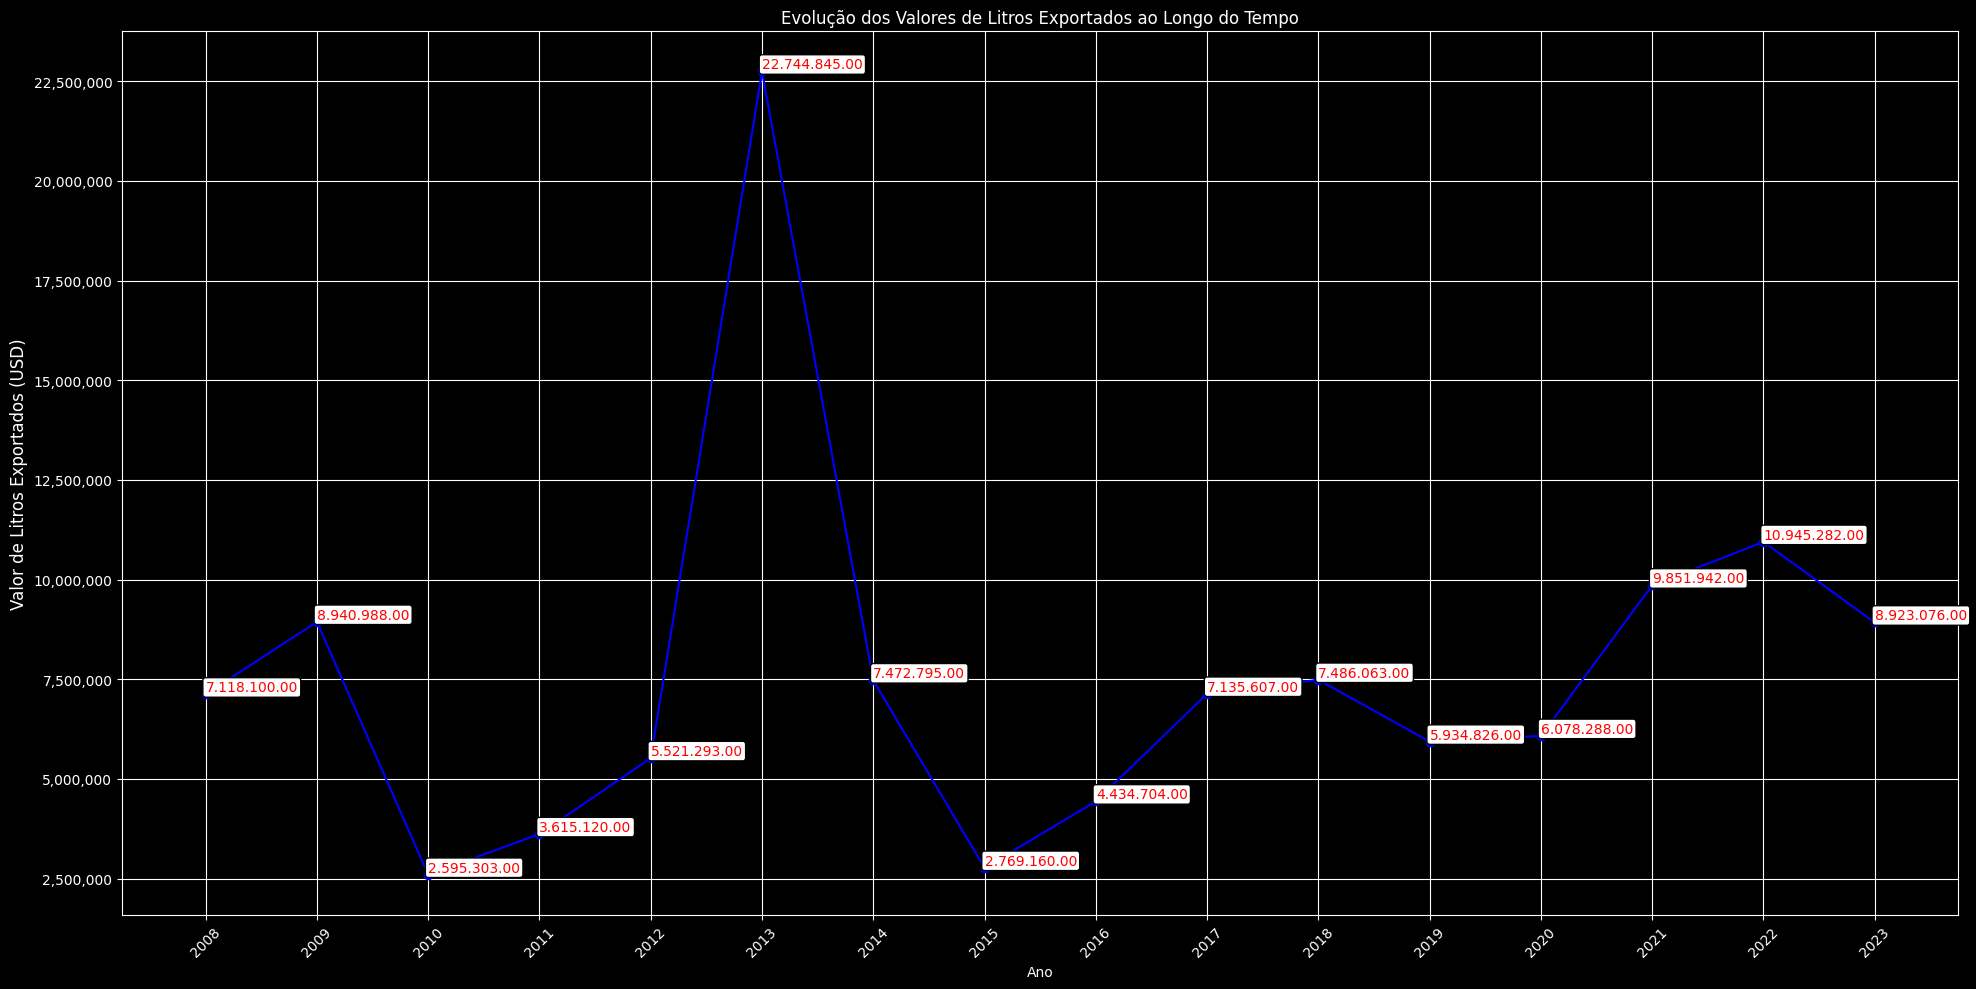

In [355]:
soma_por_ano = tabela_analise_exploratoria.groupby('Ano')['Valor de Litros Exportados'].sum()

plt.figure(figsize=(20, 10))
plt.plot(soma_por_ano.index, soma_por_ano.values, marker='o', linestyle='-', color='b')
plt.title('Evolução dos Valores de Litros Exportados ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Valor de Litros Exportados (USD)')
plt.grid(True)
plt.xticks(soma_por_ano.index, rotation=45)  

for ano, valor in zip(soma_por_ano.index, soma_por_ano.values):
    plt.text(ano, valor, '{:,.2f}'.format(valor).replace(',', '.'), ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'), color='red')

plt.ylabel('Valor de Litros Exportados (USD)', fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()



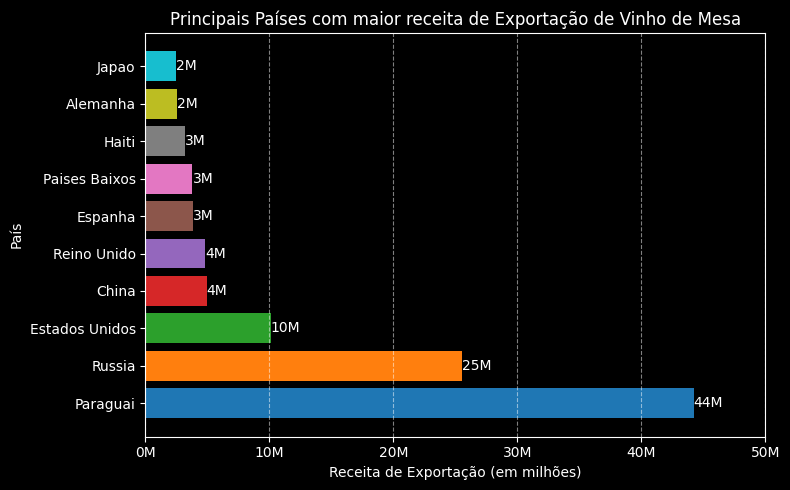

In [356]:
soma_receita_por_pais = tabela_analise_exploratoria.groupby('País')['Valor de Litros Exportados'].sum()

top_paises = soma_receita_por_pais.sort_values(ascending=False)

top5_paises = top_paises.head(10)

plt.style.use('dark_background')


colors = plt.cm.tab10(np.arange(len(top5_paises)))

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(top5_paises.index, top5_paises, color=colors)  
plt.title('Principais Países com maior receita de Exportação de Vinho de Mesa', color='white') 
plt.xlabel('Receita de Exportação (em milhões)', color='white')  
plt.ylabel('País', color='white')  


for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width / 1_000_000)}M', ha='left', va='center', color='white')


ax.grid(axis='x', linestyle='--', alpha=0.5)  

marcadores_x = np.arange(0, int(top5_paises.max()) + 10_000_000, 10_000_000)
plt.xticks(marcadores_x, [f'{int(valor / 1_000_000)}M' for valor in marcadores_x], color='white')

plt.tight_layout()
plt.show()

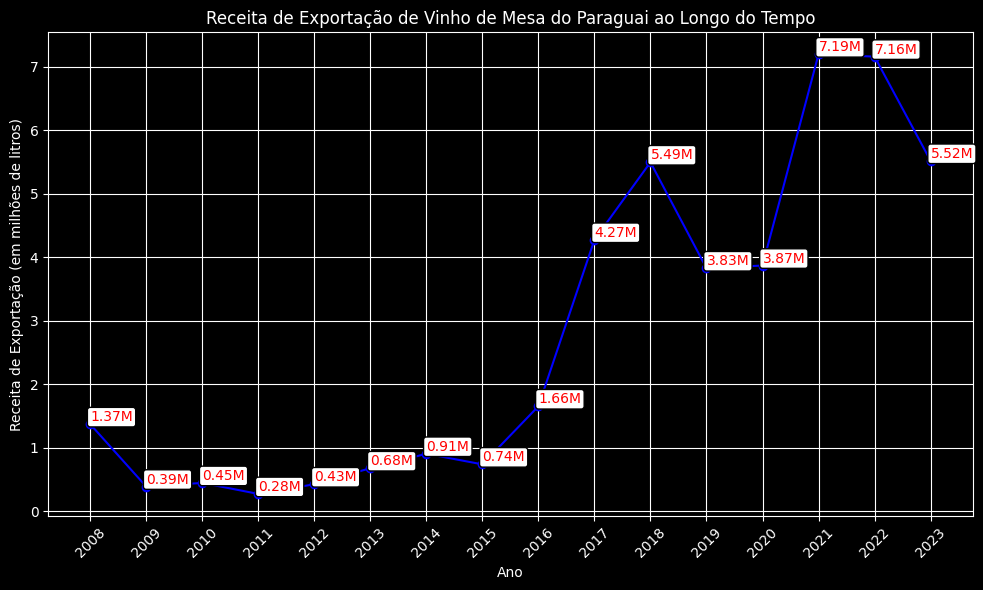

In [357]:
exportacoes_paraguai['Valor de Litros Exportados (em milhões)'] = exportacoes_paraguai['Valor de Litros Exportados'] / 1_000_000

plt.figure(figsize=(10, 6))
plt.plot(exportacoes_paraguai['Ano'], exportacoes_paraguai['Valor de Litros Exportados (em milhões)'], marker='o', color='blue', linestyle='-')
plt.title('Receita de Exportação de Vinho de Mesa do Paraguai ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Receita de Exportação (em milhões de litros)')
plt.grid(True)

for i, valor in enumerate(exportacoes_paraguai['Valor de Litros Exportados (em milhões)']):
    plt.text(exportacoes_paraguai['Ano'].iloc[i], valor, f'{valor:.2f}M', ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'), color='red')

plt.xticks(exportacoes_paraguai['Ano'], rotation=45)
plt.tight_layout()
plt.show()

In [358]:
df_paraguai_pib = pd.read_csv('PIB_Per_Capta_Paraguai.csv', sep=";")

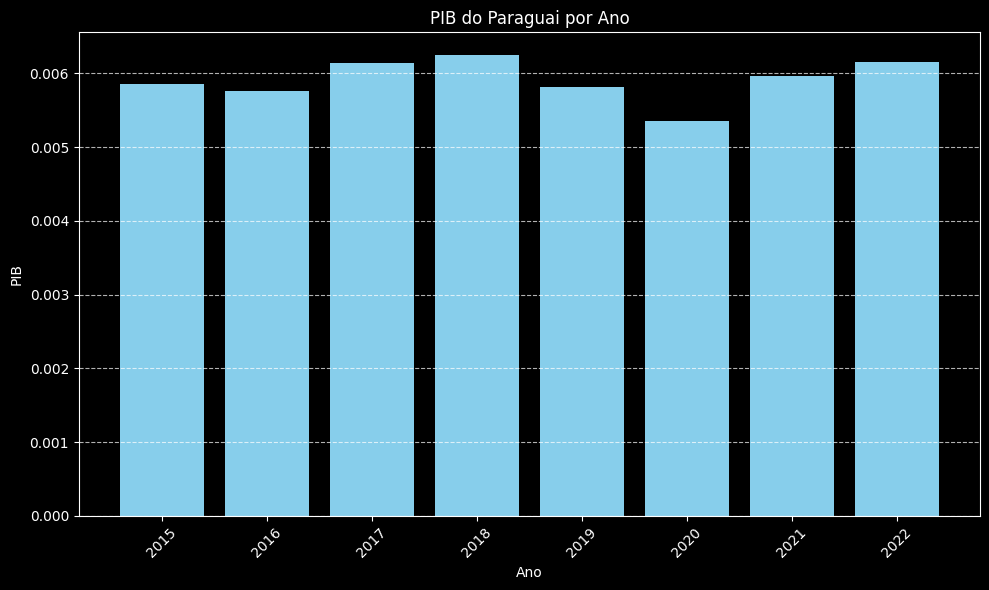

In [359]:
df_paraguai_pib.iloc[:, 1:] = df_paraguai_pib.iloc[:, 1:].replace(',', '.', regex=True).astype(float)

df_paraguai_pib.iloc[:, 1:] /= 1_000_000

anos = df_paraguai_pib.columns[1:]  
pib = df_paraguai_pib.iloc[0, 1:]  

plt.figure(figsize=(10, 6))
plt.bar(anos, pib, color='skyblue')
plt.title('PIB do Paraguai por Ano')
plt.xlabel('Ano')
plt.ylabel('PIB')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [360]:
df_paraguai_pib = pd.read_csv('PIB_Per_Capta_Paraguai.csv', sep=";")

df_paraguai_pib.iloc[:, 1:] = df_paraguai_pib.iloc[:, 1:].replace(',', '.', regex=True).astype(float)

diferencas = df_paraguai_pib.iloc[:, 1:].diff(axis=1)

variacao_media = diferencas.mean().mean()

pib_inicial = df_paraguai_pib.iloc[0, 1]

variacao_percentual = (variacao_media / pib_inicial) * 100

print("Variação média do PIB em porcentagem:", variacao_percentual)

Variação média do PIB em porcentagem: 0.7108747729999688


In [361]:
tabela_analise_exploratoria

,Ano,Origem,País,Quantidade de Litros Exportados,Valor de Litros Exportados
0,2008,Brasil,Afeganistao,0,0
1,2009,Brasil,Afeganistao,0,0
2,2010,Brasil,Afeganistao,0,0
3,2011,Brasil,Afeganistao,0,0
4,2012,Brasil,Afeganistao,0,0
...,...,...,...,...,...
2171,2019,Brasil,Austria,0,0
2172,2020,Brasil,Austria,0,0
2173,2021,Brasil,Austria,0,0
2174,2022,Brasil,Austria,6,212


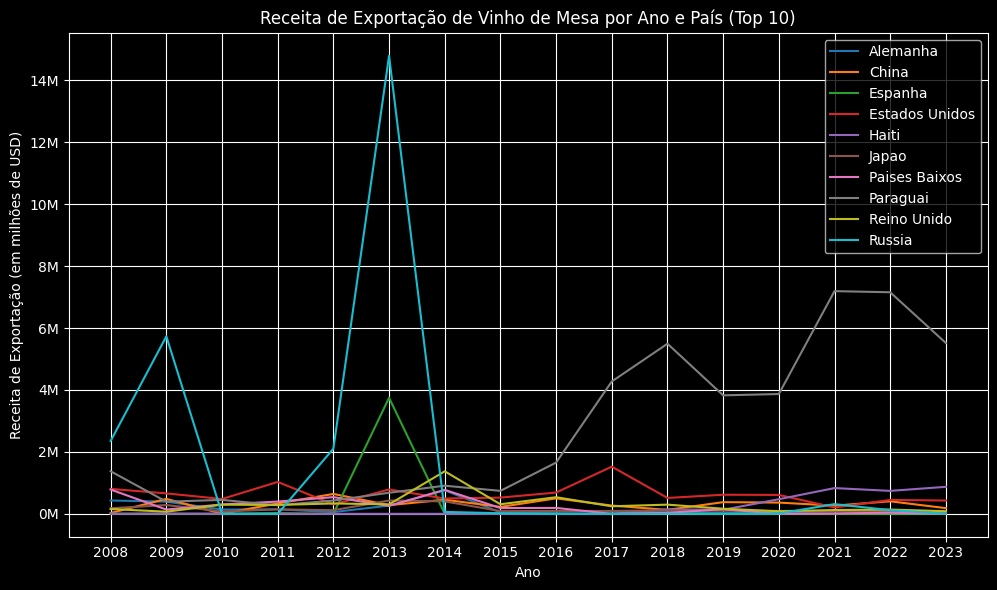

In [362]:
soma_receita_por_pais = tabela_analise_exploratoria.groupby('País')['Valor de Litros Exportados'].sum()

top10_paises = soma_receita_por_pais.sort_values(ascending=False).head(10).index

df_top10 = tabela_analise_exploratoria[tabela_analise_exploratoria['País'].isin(top10_paises)]

tabela_transposta = df_top10.pivot_table(index='Ano', columns='País', values='Valor de Litros Exportados', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.set_palette('tab10')

for pais in tabela_transposta.columns:
    plt.plot(tabela_transposta.index, tabela_transposta[pais], label=pais)

plt.title('Receita de Exportação de Vinho de Mesa por Ano e País (Top 10)')
plt.xlabel('Ano')
plt.ylabel('Receita de Exportação (em milhões de USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

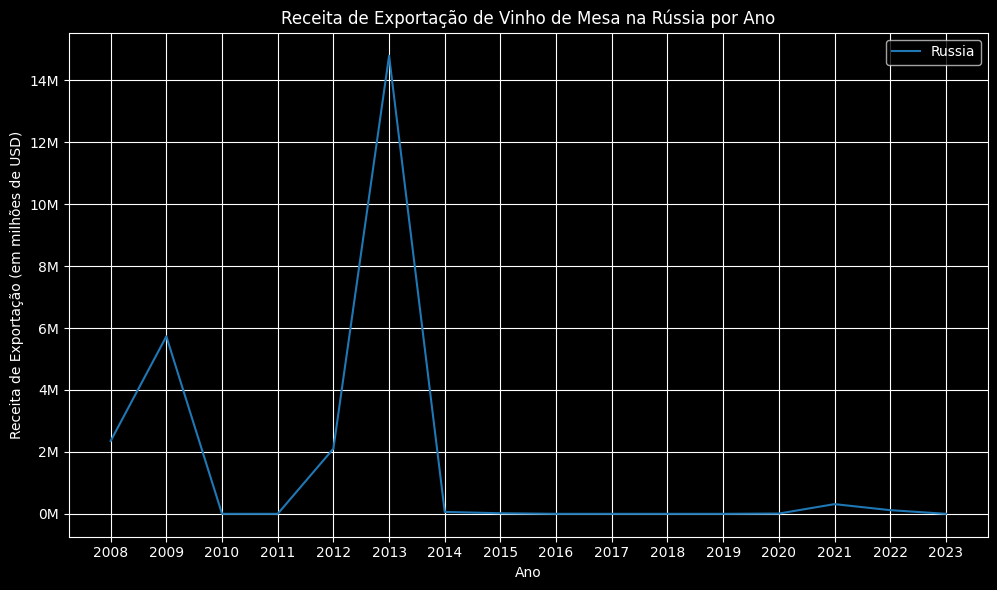

In [363]:
dados_russia = tabela_analise_exploratoria[tabela_analise_exploratoria['País'] == 'Russia']

tabela_transposta = dados_russia.pivot_table(index='Ano', columns='País', values='Valor de Litros Exportados', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.set_palette('tab10')

plt.plot(tabela_transposta.index, tabela_transposta['Russia'], label='Russia', color='tab:blue')

plt.title('Receita de Exportação de Vinho de Mesa na Rússia por Ano')
plt.xlabel('Ano')
plt.ylabel('Receita de Exportação (em milhões de USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

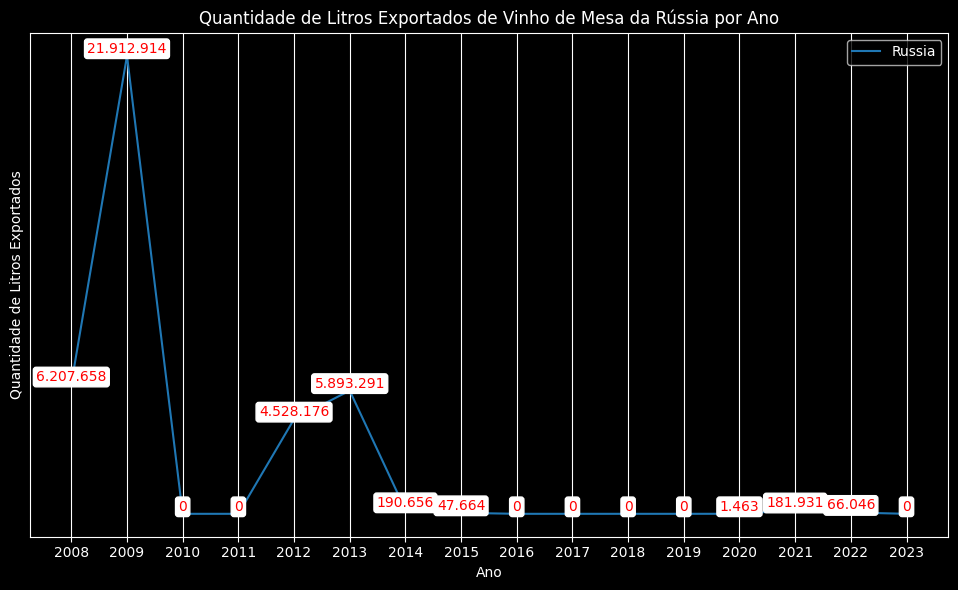

In [364]:
dados_russia = tabela_analise_exploratoria[tabela_analise_exploratoria['País'] == 'Russia']

tabela_transposta = dados_russia.pivot_table(index='Ano', columns='País', values='Quantidade de Litros Exportados', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.set_palette('tab10')

plt.plot(tabela_transposta.index, tabela_transposta['Russia'], label='Russia', color='tab:blue')

for ano, valor in zip(tabela_transposta.index, tabela_transposta['Russia']):
    plt.text(ano, valor, '{:,.0f}'.format(valor).replace(',', '.'), color='red', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))

plt.title('Quantidade de Litros Exportados de Vinho de Mesa da Rússia por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Litros Exportados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.yticks([])
plt.show()

In [365]:
soma_por_ano = tabela_analise_exploratoria.groupby('Ano').agg({'Quantidade de Litros Exportados': 'sum', 'Valor de Litros Exportados': 'sum'}).reset_index()
soma_por_pais = tabela_analise_exploratoria.groupby('País').agg({'Quantidade de Litros Exportados': 'sum', 'Valor de Litros Exportados': 'sum'}).reset_index()

In [366]:
soma_por_ano

,Ano,Quantidade de Litros Exportados,Valor de Litros Exportados
0,2008,10346323,7118100
1,2009,25514198,8940988
2,2010,1280574,2595303
3,2011,1214834,3615120
4,2012,5775376,5521293
5,2013,9149059,22744845
6,2014,2324029,7472795
7,2015,1198479,2769160
8,2016,1786549,4434704
9,2017,2889572,7135607


In [367]:
soma_por_pais

,País,Quantidade de Litros Exportados,Valor de Litros Exportados
0,Afeganistao,11,46
1,Africa do Sul,147,814
2,Alemanha,913857,2578247
3,Angola,168868,576189
4,Antigua e Barbuda,2487,9586
...,...,...,...
120,Tuvalu,2,4
121,Uruguai,1118688,1674149
122,Vanuatu,18,31
123,Venezuela,196545,309340


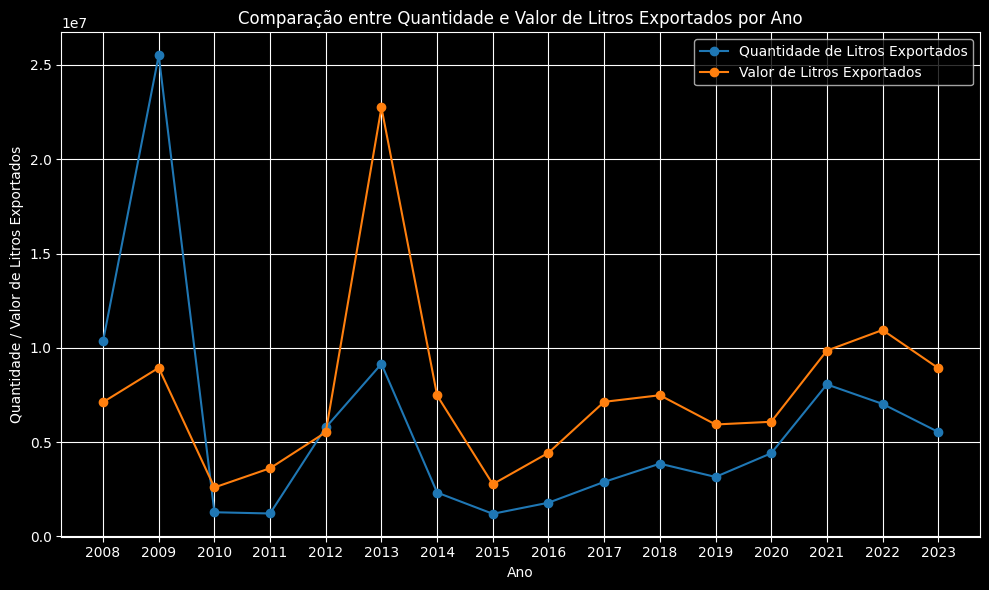

In [368]:
anos = soma_por_ano['Ano']
quantidade_litros = soma_por_ano['Quantidade de Litros Exportados']
valor_litros = soma_por_ano['Valor de Litros Exportados']

plt.figure(figsize=(10, 6))
plt.plot(anos, quantidade_litros, label='Quantidade de Litros Exportados', marker='o')
plt.plot(anos, valor_litros, label='Valor de Litros Exportados', marker='o')

plt.title('Comparação entre Quantidade e Valor de Litros Exportados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade / Valor de Litros Exportados')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [369]:
soma_por_pais

,País,Quantidade de Litros Exportados,Valor de Litros Exportados
0,Afeganistao,11,46
1,Africa do Sul,147,814
2,Alemanha,913857,2578247
3,Angola,168868,576189
4,Antigua e Barbuda,2487,9586
...,...,...,...
120,Tuvalu,2,4
121,Uruguai,1118688,1674149
122,Vanuatu,18,31
123,Venezuela,196545,309340


In [370]:
soma_por_pais_ordenado = soma_por_pais.sort_values(by='Valor de Litros Exportados', ascending=False)
top_paises = soma_por_pais_ordenado.head(10)  
top_paises['Taxa_dolar_por_litro'] = top_paises['Valor de Litros Exportados'] / top_paises['Quantidade de Litros Exportados']
media_taxa_dolar_por_litro = top_paises['Taxa_dolar_por_litro'].mean()
print("Média da taxa de dólar por litro de exportação:", media_taxa_dolar_por_litro)

Média da taxa de dólar por litro de exportação: 2.158489130083097


C:\Users\amarson\AppData\Local\Temp\7\ipykernel_42200\3458690255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_paises['Taxa_dolar_por_litro'] = top_paises['Valor de Litros Exportados'] / top_paises['Quantidade de Litros Exportados']


In [371]:
soma_por_pais["Média do Dólar"] = soma_por_pais["Valor de Litros Exportados"] / soma_por_pais["Quantidade de Litros Exportados"]
soma_por_pais

,País,Quantidade de Litros Exportados,Valor de Litros Exportados,Média do Dólar
0,Afeganistao,11,46,4.181818
1,Africa do Sul,147,814,5.537415
2,Alemanha,913857,2578247,2.821281
3,Angola,168868,576189,3.412067
4,Antigua e Barbuda,2487,9586,3.854443
...,...,...,...,...
120,Tuvalu,2,4,2.000000
121,Uruguai,1118688,1674149,1.496529
122,Vanuatu,18,31,1.722222
123,Venezuela,196545,309340,1.573889


In [372]:
paises_desejados = ['Alemanha', 'China', 'Espanha', 'Estados Unidos', 'Haiti', 'Japao', 'Paises Baixos', 'Paraguai', 'Reino Unido', 'Russia']

soma_por_pais_filtrado = soma_por_pais.loc[soma_por_pais['País'].isin(paises_desejados)]

soma_por_pais_filtrado = soma_por_pais_filtrado[['País', 'Quantidade de Litros Exportados', 'Valor de Litros Exportados', 'Média do Dólar']]

soma_por_pais_filtrado = soma_por_pais_filtrado.rename(columns={'Média do Dólar': 'Média US$ por Litro'})

soma_por_pais_filtrado


,País,Quantidade de Litros Exportados,Valor de Litros Exportados,Média US$ por Litro
2,Alemanha,913857,2578247,2.821281
29,China,2583375,4929621,1.908210
46,Espanha,1993180,3812723,1.912884
47,Estados Unidos,3793194,10113658,2.666264
61,Haiti,2351248,3198869,1.360498
71,Japao,1204634,2435496,2.021773
93,Paises Baixos,1238398,3796569,3.065710
96,Paraguai,32995148,44236294,1.340691
102,Reino Unido,1250877,4796011,3.834119
103,Russia,39029799,25504484,0.653462


In [373]:
caminho_arquivo = 'media_taxa_dolar.csv'
soma_por_pais_filtrado.to_csv(caminho_arquivo, sep=';', index=False)

In [374]:
nomes_paises = soma_por_pais['País'].unique()
print(nomes_paises)

['Afeganistao' 'Africa do Sul' 'Alemanha' 'Angola' 'Antigua e Barbuda'
 'Antilhas Holandesas' 'Arabia Saudita' 'Argentina' 'Aruba' 'Australia'
 'Austria' 'Bahamas' 'Bangladesh' 'Barbados' 'Barein' 'Belgica' 'Belice'
 'Benin' 'Bermudas' 'Bolivia' 'Bosnia-Herzegovina' 'Brasil' 'Bulgaria'
 'Cabo Verde' 'Camaroes' 'Canada' 'Catar' 'Cayman, Ilhas' 'Chile' 'China'
 'Cipre' 'Cocos (Keeling), Ilhas' 'Colombia' 'Comores' 'Congo'
 'Coreia do Sul' 'Costa Rica' 'Croacia' 'Cuba' 'Curacao' 'Dinamarca'
 'Dominica' 'El Salvador' 'Emirados Arabes Unidos' 'Equador'
 'Eslovaca, Republica' 'Espanha' 'Estados Unidos' 'Estonia' 'Filipinas'
 'Finlandia' 'Franca' 'Gana' 'Gibraltar' 'Granada' 'Grecia' 'Guatemala'
 'Guiana' 'Guiana Francesa' 'Guine Bissau' 'Guine Equatorial' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungria' 'Ilha de Man' 'India' 'Indonesia' 'Ira'
 'Irlanda' 'Italia' 'Japao' 'Jordania' 'Letonia' 'Liberia' 'Luxemburgo'
 'Macau' 'Malasia' 'Malavi' 'Malta' 'Marshall, Ilhas' 'Martinica'
 'Mauritania' 'Mexic

In [377]:
continentes = {
    'Afeganistao': 'Ásia',
    'Africa do Sul': 'África',
    'Alemanha': 'Europa',
    'Angola': 'África',
    'Antigua e Barbuda': 'América do Norte',
    'Antilhas Holandesas': 'América do Norte',
    'Arabia Saudita': 'Ásia',
    'Argentina': 'América do Sul',
    'Aruba': 'América do Norte',
    'Australia': 'Oceania',
    'Austria': 'Europa',
    'Bahamas': 'América do Norte',
    'Bangladesh': 'Ásia',
    'Barbados': 'América do Norte',
    'Barein': 'Ásia',
    'Belgica': 'Europa',
    'Belice': 'América do Norte',
    'Benin': 'África',
    'Bermudas': 'América do Norte',
    'Bolivia': 'América do Sul',
    'Bosnia-Herzegovina': 'Europa',
    'Brasil': 'América do Sul',
    'Bulgaria': 'Europa',
    'Cabo Verde': 'África',
    'Camaroes': 'África',
    'Canada': 'América do Norte',
    'Catar': 'Ásia',
    'Cayman, Ilhas': 'América do Norte',
    'Chile': 'América do Sul',
    'China': 'Ásia',
    'Cipre': 'Europa',
    'Cocos (Keeling), Ilhas': 'Oceania',
    'Colombia': 'América do Sul',
    'Comores': 'África',
    'Congo': 'África',
    'Coreia do Sul': 'Ásia',
    'Costa Rica': 'América do Norte',
    'Croacia': 'Europa',
    'Cuba': 'América do Norte',
    'Curacao': 'América do Norte',
    'Dinamarca': 'Europa',
    'Dominica': 'América do Norte',
    'El Salvador': 'América do Norte',
    'Emirados Arabes Unidos': 'Ásia',
    'Equador': 'América do Sul',
    'Eslovaca, Republica': 'Europa',
    'Espanha': 'Europa',
    'Estados Unidos': 'América do Norte',
    'Estonia': 'Europa',
    'Filipinas': 'Ásia',
    'Finlandia': 'Europa',
    'Franca': 'Europa',
    'Gana': 'África',
    'Gibraltar': 'Europa',
    'Granada': 'América do Norte',
    'Grecia': 'Europa',
    'Guatemala': 'América do Norte',
    'Guiana': 'América do Sul',
    'Guiana Francesa': 'América do Sul',
    'Guine Bissau': 'África',
    'Guine Equatorial': 'África',
    'Haiti': 'América do Norte',
    'Honduras': 'América do Norte',
    'Hong Kong': 'Ásia',
    'Hungria': 'Europa',
    'Ilha de Man': 'Europa',
    'India': 'Ásia',
    'Indonesia': 'Ásia',
    'Ira': 'Ásia',
    'Irlanda': 'Europa',
    'Italia': 'Europa',
    'Japao': 'Ásia',
    'Jordania': 'Ásia',
    'Letonia': 'Europa',
    'Liberia': 'África',
    'Luxemburgo': 'Europa',
    'Macau': 'Ásia',
    'Malasia': 'Ásia',
    'Malavi': 'África',
    'Malta': 'Europa',
    'Marshall, Ilhas': 'Oceania',
    'Martinica': 'América do Norte',
    'Mauritania': 'África',
    'Mexico': 'América do Norte',
    'Mocambique': 'África',
    'Montenegro': 'Europa',
    'Namibia': 'África',
    'Nicaragua': 'América do Norte',
    'Nigeria': 'África',
    'Noruega': 'Europa',
    'Nova Caledonia': 'Oceania',
    'Nova Zelandia': 'Oceania',
    'Oma': 'Ásia',
    'Paises Baixos': 'Europa',
    'Palau': 'Oceania',
    'Panama': 'América do Norte',
    'Paraguai': 'América do Sul',
    'Peru': 'América do Sul',
    'Pitcairn': 'Oceania',
    'Polonia': 'Europa',
    'Portugal': 'Europa',
    'Quenia': 'África',
    'Reino Unido': 'Europa',
    'Russia': 'Europa',
    'Sao Cristovao e Nevis': 'América do Norte',
    'Sao Tome e Principe': 'África',
    'Sao Vicente e Granadinas': 'América do Norte',
    'Serra Leoa': 'África',
    'Singapura': 'Ásia',
    'Suazilandia': 'África',
    'Suecia': 'Europa',
    'Suica': 'Europa',
    'Suriname': 'América do Sul',
    'Tailandia': 'Ásia',
    'Taiwan (Formosa)': 'Ásia',
    'Tcheca, Republica': 'Europa',
    'Togo': 'África',
    'Toquelau': 'Oceania',
    'Trinidade Tobago': 'América do Sul',
    'Turquia': 'Ásia',
    'Tuvalu': 'Oceania',
    'Uruguai': 'América do Sul',
    'Vanuatu': 'Oceania',
    'Venezuela': 'América do Sul',
    'Vietna': 'Ásia',
}

soma_por_pais['Continente'] = soma_por_pais['País'].map(continentes)

soma_por_pais


,País,Quantidade de Litros Exportados,Valor de Litros Exportados,Média do Dólar,Continente
0,Afeganistao,11,46,4.181818,Ásia
1,Africa do Sul,147,814,5.537415,África
2,Alemanha,913857,2578247,2.821281,Europa
3,Angola,168868,576189,3.412067,África
4,Antigua e Barbuda,2487,9586,3.854443,América do Norte
...,...,...,...,...,...
120,Tuvalu,2,4,2.000000,Oceania
121,Uruguai,1118688,1674149,1.496529,América do Sul
122,Vanuatu,18,31,1.722222,Oceania
123,Venezuela,196545,309340,1.573889,América do Sul


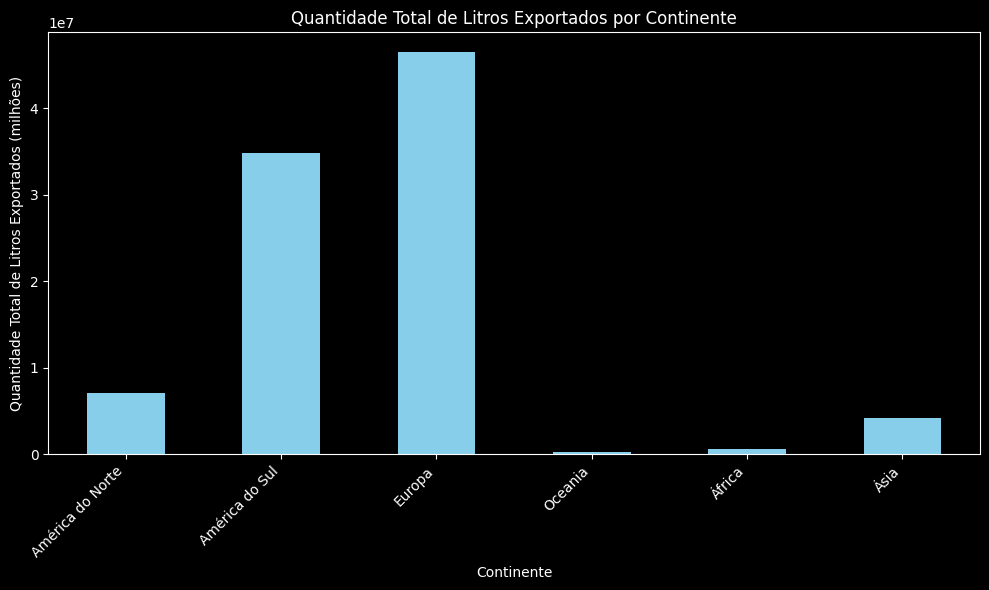

In [389]:
soma_por_continente = soma_por_pais.groupby('Continente')['Quantidade de Litros Exportados'].sum()

plt.figure(figsize=(10, 6))
soma_por_continente.plot(kind='bar', color='skyblue')
plt.title('Quantidade Total de Litros Exportados por Continente')
plt.xlabel('Continente')
plt.ylabel('Quantidade Total de Litros Exportados (milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [378]:
soma_por_pais

,País,Quantidade de Litros Exportados,Valor de Litros Exportados,Média do Dólar,Continente
0,Afeganistao,11,46,4.181818,Ásia
1,Africa do Sul,147,814,5.537415,África
2,Alemanha,913857,2578247,2.821281,Europa
3,Angola,168868,576189,3.412067,África
4,Antigua e Barbuda,2487,9586,3.854443,América do Norte
...,...,...,...,...,...
120,Tuvalu,2,4,2.000000,Oceania
121,Uruguai,1118688,1674149,1.496529,América do Sul
122,Vanuatu,18,31,1.722222,Oceania
123,Venezuela,196545,309340,1.573889,América do Sul
